In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Customer_Acqusition = pd.read_csv("C:/Users/Pawan Sharma/Desktop/AnalytixLabs/Case Studies/Python/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
Customer_Acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
Repayment = pd.read_csv("C:/Users/Pawan Sharma/Desktop/AnalytixLabs/Case Studies/Python/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv")
Repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [5]:
spend = pd.read_csv("C:/Users/Pawan Sharma/Desktop/AnalytixLabs/Case Studies/Python/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv")
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


## Question 1 (a)

In [6]:
Customer_Acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [7]:
Customer_Acqusition["Age"] = np.where(Customer_Acqusition["Age"] < 18, np.mean(Customer_Acqusition["Age"]), Customer_Acqusition["Age"])
Customer_Acqusition["Age"].head()

0    76.0
1    71.0
2    34.0
3    47.0
4    56.0
Name: Age, dtype: float64

In [8]:
(Customer_Acqusition["Age"]<18).sum()

0

## Question 1(b)

In [9]:
joined_data = pd.merge(left = Customer_Acqusition,right = spend, how = "inner", left_on = "Customer", right_on="Customer" )[['Customer', 'Age', 'City', 'Product', 'Limit', 'Company','Segment', 'Month', 'Type', 'Amount']]
joined_data

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [10]:
joined_data["Amount"] = np.where(joined_data["Amount"]> joined_data["Limit"], 0.50*joined_data["Limit"], joined_data["Amount"])
joined_data["Amount"]

0       485470.80
1       410556.13
2        23740.46
3       484342.47
4       369694.07
          ...    
1495     54729.66
1496      5000.00
1497      5000.50
1498      5001.00
1499     50000.00
Name: Amount, Length: 1500, dtype: float64

## Question 1(c)

In [11]:
combined_data = pd.merge(left = joined_data, right = Repayment, how = "inner", left_on = "Customer", right_on = "Customer")[['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment','Month_x', 'Type', 'Amount_x', 'Month_y', 'Amount_y']]
combined_data

#Amount.x is Spend amount.
#Month.x is date of spend amount.
#Amount.y is Repayment.
#Month.y is date of Repayment.

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,310992.30
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,121874.90
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,3-Jan-04,337815.57
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,25682.73


In [12]:
combined_data["Amount_y"] = np.where(combined_data["Amount_y"] > combined_data["Limit"], combined_data["Limit"], combined_data["Amount_y"])
combined_data["Amount_y"]

0        495414.75
1        245899.02
2        259490.06
3        437555.12
4        165972.88
           ...    
37279    100000.00
37280     10000.00
37281     10001.00
37282     10002.00
37283     69551.19
Name: Amount_y, Length: 37284, dtype: float64

## Question 2(a)

In [13]:
combined_data.Customer.nunique()

100

## Question 2(b)

In [14]:
combined_data.Type.nunique()

15

## Question 2(c)

In [15]:
combined_data.Month_x = pd.to_datetime(combined_data.Month_x)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  37284 non-null  object        
 1   Age       37284 non-null  float64       
 2   City      37284 non-null  object        
 3   Product   37284 non-null  object        
 4   Limit     37284 non-null  float64       
 5   Company   37284 non-null  object        
 6   Segment   37284 non-null  object        
 7   Month_x   37284 non-null  datetime64[ns]
 8   Type      37284 non-null  object        
 9   Amount_x  37284 non-null  float64       
 10  Month_y   37284 non-null  object        
 11  Amount_y  37284 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 3.7+ MB


In [16]:
#Creating a new column 'Month_Spend' of Month_x (date of spend amount).
combined_data["Month_Spending"] = combined_data.Month_x.dt.month
combined_data.head()    

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Month_Spending
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,12-Jan-04,495414.75,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,3-Jan-04,245899.02,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,15-Jan-04,259490.06,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,25-Jan-04,437555.12,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,17-Jan-05,165972.88,1


In [17]:
combined_data[["Customer", "Month_Spending", "Amount_x"]].groupby(["Customer","Month_Spending"]).Amount_x.mean().reset_index()

,Customer,Month_Spending,Amount_x
0,A1,1,372762.587143
1,A1,2,175235.690000
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
...,...,...,...
573,A95,1,240401.500000
574,A96,1,54729.660000
575,A97,1,5000.000000
576,A98,1,5000.500000


## Question 2(d)

In [18]:
combined_data.Month_y = pd.to_datetime(combined_data.Month_y)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer        37284 non-null  object        
 1   Age             37284 non-null  float64       
 2   City            37284 non-null  object        
 3   Product         37284 non-null  object        
 4   Limit           37284 non-null  float64       
 5   Company         37284 non-null  object        
 6   Segment         37284 non-null  object        
 7   Month_x         37284 non-null  datetime64[ns]
 8   Type            37284 non-null  object        
 9   Amount_x        37284 non-null  float64       
 10  Month_y         37284 non-null  datetime64[ns]
 11  Amount_y        37284 non-null  float64       
 12  Month_Spending  37284 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 4.0+ MB


In [19]:
#Creating a new column 'Month_Spend' of Month_y (date of repayment amount).
combined_data["Month_Repayment"] = combined_data.Month_y.dt.month
combined_data.head() 

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Month_Spending,Month_Repayment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1


In [20]:
combined_data[["Customer", "Month_Repayment", "Amount_y"]].groupby(["Customer","Month_Repayment"]).Amount_y.mean().reset_index()

,Customer,Month_Repayment,Amount_y
0,A1,1,343972.327143
1,A1,2,156374.760000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
...,...,...,...
553,A95,1,369405.960000
554,A96,1,100000.000000
555,A97,1,10000.000000
556,A98,1,10001.000000


## Question 2(e)

In [21]:
dataset = combined_data[["Customer", "Month_Repayment", "Amount_y"]].groupby(["Customer","Month_Repayment"]).Amount_y.sum().reset_index()
dataset["Profits"] = dataset.Amount_y*0.029
dataset

,Customer,Month_Repayment,Amount_y,Profits
0,A1,1,43340513.22,1.256875e+06
1,A1,2,14073728.40,4.081381e+05
2,A1,4,9161084.88,2.656715e+05
3,A1,7,5349181.32,1.551263e+05
4,A1,9,3355695.00,9.731515e+04
...,...,...,...,...
553,A95,1,369405.96,1.071277e+04
554,A96,1,100000.00,2.900000e+03
555,A97,1,10000.00,2.900000e+02
556,A98,1,10001.00,2.900290e+02


# Question 2(f)

In [22]:
combined_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Month_Spending,Month_Repayment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1


In [23]:
#Amount.x is the Spending amount of each Type
combined_data[["Type", "Amount_x"]].drop_duplicates().sort_values(by = "Amount_x", ascending = False).head(5)

,Type,Amount_x
21153,SHOPPING,499270.00
2490,JEWELLERY,498388.88
3315,RENTAL,497770.15
32692,AIR TICKET,497368.07
5853,SHOPPING,496915.29


## Question 2(g)

In [24]:
combined_data[["City", "Amount_x"]].groupby("City").Amount_x.max().reset_index().sort_values(by = "Amount_x", ascending = False).head(5)

,City,Amount_x
2,CALCUTTA,499270.00
1,BOMBAY,497770.15
3,CHENNAI,497368.07
6,PATNA,496185.13
4,COCHIN,494457.44


##### Calcutta city has the maximum spending amount

## Question 2(h)

In [36]:
#data = combined_data[["Age", "Amount_x"]].groupby("Age").Amount_x.sum().reset_index()
#data
combined_data["Age_cat"] = np.where(((combined_data["Age"] > 18) & (combined_data["Age"] < 25)), "Young",
                                    np.where(((combined_data["Age"] > 25) & (combined_data["Age"] < 50)), "Adults", "Senior"))
combined_data.loc[:, ["Amount_x", "Age_cat"]].groupby("Age_cat").Amount_x.sum().reset_index()



,Age_cat,Amount_x
0,Adults,3.210035e+09
1,Senior,2.124249e+09
2,Young,4.137042e+08


## Question 2(i)

In [353]:
#Amount.y is the repayment amount of each Type

data = combined_data[["Customer", "Amount_y"]].groupby("Customer").Amount_y.sum().reset_index()
data.sort_values(by = "Amount_y", ascending = False).head(10)

,Customer,Amount_y
58,A61,4.004874e+08
57,A60,3.752990e+08
5,A13,2.967320e+08
38,A43,2.631860e+08
40,A45,2.618984e+08
4,A12,2.583776e+08
6,A14,2.462413e+08
39,A44,2.400866e+08
33,A39,2.362970e+08
37,A42,2.360793e+08


## Question 3

In [452]:
#Creating new column 'Year_Spending' of spending amount date
combined_data["Year_Spending"] = combined_data.Month_x.dt.year

new_dataset = combined_data[["City", "Product", "Year_Spending", "Amount_x"]].groupby(["City", "Product", "Year_Spending"]).Amount_x.sum().reset_index()
new_dataset.sort_values(by = "Amount_x", ascending = False)

,City,Product,Year_Spending,Amount_x
1,BANGALORE,Gold,2005,3.570769e+08
37,COCHIN,Gold,2005,3.353611e+08
2,BANGALORE,Gold,2006,3.293757e+08
20,CALCUTTA,Gold,2006,2.993109e+08
19,CALCUTTA,Gold,2005,2.851718e+08
...,...,...,...,...
70,TRIVANDRUM,Silver,2005,5.128347e+06
48,DELHI,Platimum,2004,5.103232e+06
33,CHENNAI,Silver,2004,4.146619e+06
69,TRIVANDRUM,Silver,2004,3.819369e+06


<AxesSubplot:title={'center':'City Wise Spending of each Product On Yearly Basis'}, ylabel='Product,City'>

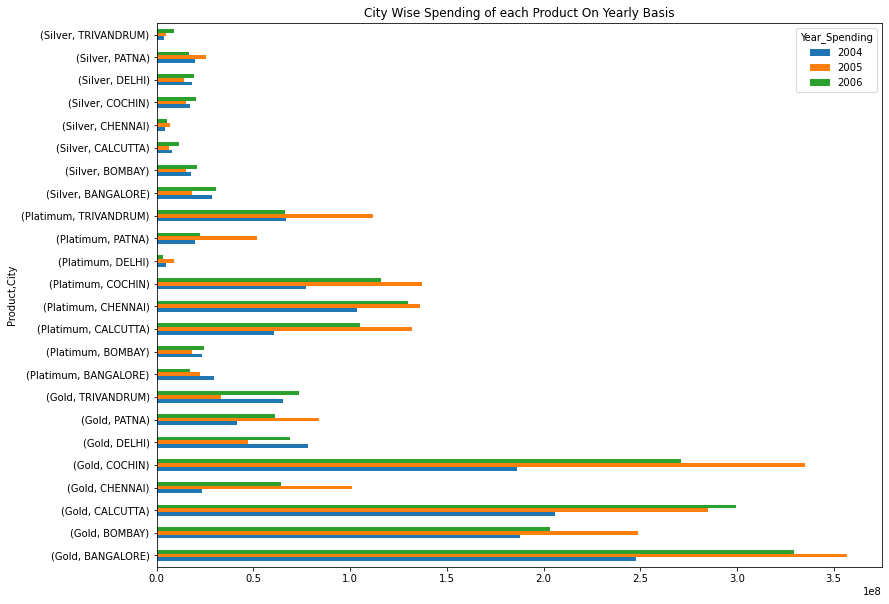

In [453]:
#Creating Pivot table 
df = new_dataset.pivot_table(index =["Product", "City"], columns ="Year_Spending" , values = "Amount_x")
#Drawing bar plot
df.plot.barh(figsize = (13,10), ylabel = "Amount_x", title = "City Wise Spending of each Product On Yearly Basis")

# Question 4(a)

In [450]:
new_df = combined_data[["Month_Spending", "City", "Amount_x"]].groupby(["Month_Spending", "City"]).Amount_x.sum().reset_index()
new_df

,Month_Spending,City,Amount_x
0,1,BANGALORE,2.308396e+08
1,1,BOMBAY,1.657191e+08
2,1,CALCUTTA,2.528739e+08
3,1,CHENNAI,1.133370e+08
4,1,COCHIN,2.998696e+08
...,...,...,...
91,12,CHENNAI,4.248937e+06
92,12,COCHIN,2.273342e+07
93,12,DELHI,1.294262e+07
94,12,PATNA,1.550000e+06


<AxesSubplot:title={'center':'City Wise Total Spending of each Month'}, xlabel='Month_Spending'>

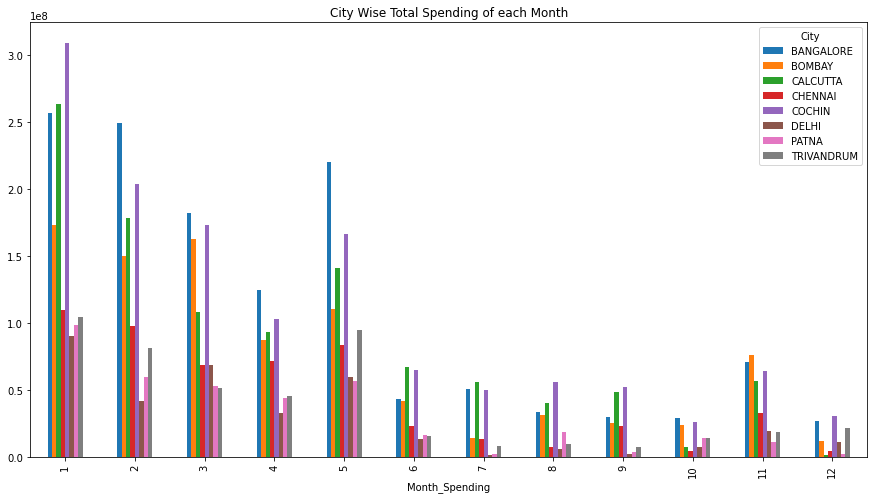

In [430]:
new_df.pivot_table(index =["Month_Spending"], columns = "City", values = "Amount_x" ).plot.bar(figsize = (15,8), title = "City Wise Total Spending of each Month")

## Question 4(b)

<AxesSubplot:title={'center':'Comparison of Yearly Spend On Air Tickets'}, xlabel='Year_Spending', ylabel='Amount_x'>

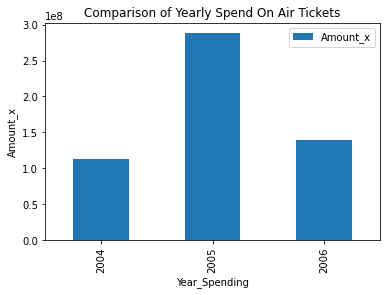

In [449]:
dataframe = combined_data.loc[combined_data.Type == "AIR TICKET", ["Type", "Year_Spending", "Amount_x"]].groupby("Year_Spending").Amount_x.sum().reset_index()
dataframe.plot.bar(x = "Year_Spending", y = "Amount_x", ylabel="Amount_x", title = "Comparison of Yearly Spend On Air Tickets")

## Question 4(c)

<AxesSubplot:xlabel='Month_Spending'>

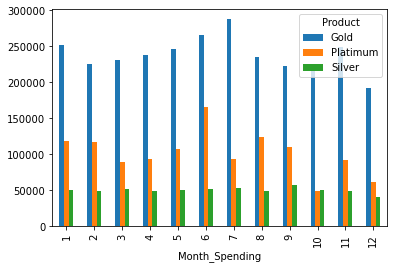

In [477]:
new_data = combined_data[["Product", "Month_Spending", "Amount_x"]].pivot_table(index = "Month_Spending", columns="Product" , values = "Amount_x")
new_data.plot.bar()

## Question 5

In [46]:
combined_data["yearly"]=combined_data.Month_y.apply(lambda Month_y:Month_y.year)
combined_data["Month"] = combined_data.Month_y.apply(lambda Month_y:Month_y.month)



def top_10_Customers(Product_Category,Time_Period):
    return combined_data.loc[(combined_data.Product == Product_Category)].groupby(['Customer','City','Product',Time_Period]).Amount_y.sum().reset_index().sort_values('Amount_y',ascending=False).head(10)

In [58]:
top_10_Customers_repayments=top_10_Customers(Product_Category="Gold",Time_Period = "yearly")
top_10_Customers_repayments

,Customer,City,Product,yearly,Amount_y
64,A61,COCHIN,Gold,2005,1.625207e+08
65,A61,COCHIN,Gold,2006,1.422768e+08
61,A60,CALCUTTA,Gold,2005,1.422285e+08
55,A44,DELHI,Gold,2005,1.291249e+08
58,A45,COCHIN,Gold,2005,1.253159e+08
52,A43,BANGALORE,Gold,2005,1.242157e+08
62,A60,CALCUTTA,Gold,2006,1.232231e+08
13,A13,BANGALORE,Gold,2005,1.164879e+08
60,A60,CALCUTTA,Gold,2004,1.098474e+08
14,A13,BANGALORE,Gold,2006,1.077968e+08
